In [1]:
import torch
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from pathlib import Path
from sklearn.manifold import TSNE

from open_dataset import load_folds

In [2]:
dataset_names = ["photo"]
models = ["gcn", "pown"]

In [11]:
class_map = {
    2 : "Known class",
    0 : "New Class 1",
    1 : "New Class 2",
    3 : "New Class 3",
    6 : "New Class 4",
    7 : "New Class 5"
    
}

In [12]:
def relplo_version():
    dataframes = []
    for dataset_name in dataset_names:
        for model in models:
            
            path = Path("embeddings/embeddings_"+model+"_"+dataset_name+".pth")
            embeddings = torch.load(path)
            embeddings = embeddings.detach().numpy()
    
            path = Path("embeddings/tsne_repr_"+model+"_"+dataset_name+".pth")
            if path.is_file():
                recuded_repr = torch.load(path)
            else:
                tsne = TSNE(n_components=2, n_jobs=-1)
                recuded_repr= tsne.fit_transform(embeddings)
                recuded_repr = torch.Tensor(recuded_repr)
                torch.save(recuded_repr, path)
    
            datasets = load_folds(dataset_name, unknown_class_ratio=0.4)
            data = datasets[0]
    
            labels = data.y
            known_class_label =  data.known_classes[0]
            labels[data.known_class_mask] = known_class_label
            length = data.y.max()+1
        
            mask = data.all_class_test_mask
            data_np = recuded_repr[mask,:].numpy()
            class_labels_np = labels[mask].numpy()
            df = pd.DataFrame({'x': data_np[:, 0], 'y': data_np[:, 1], 'Class': class_labels_np})
            df["model"] = model
            dataframes.append(df)
    final_df = pd.concat(dataframes, ignore_index=True)
    final_df["Class"]  = list(map(lambda value: class_map[value], final_df["Class"].tolist()))

    return final_df

In [13]:
final_df = relplo_version()
final_df.head(5)

,x,y,Class,model
0,-45.454060,-19.398108,New Class 4,gcn
1,-5.564085,-5.647868,Known class,gcn
2,-8.169153,9.695555,New Class 4,gcn
3,-24.823420,33.254318,Known class,gcn
4,-39.046890,-20.629465,Known class,gcn


In [14]:
datasets = load_folds("photo", unknown_class_ratio=0.4)
data = datasets[0]
data.unknown_classes

tensor([3, 7, 0, 1, 6])

In [15]:
length = data.y.max()+1
num_classes = length
labels = data.y
known_class_label =  data.known_classes[0]
labels[data.known_class_mask] = known_class_label

known_class_label

tensor(2)

In [20]:
unique_values = final_df["Class"].unique().tolist()

In [43]:
default_palette =  sns.color_palette("husl", 4)


custom_palette = {}
for i, description in enumerate(unique_values):
    rgba_color = list(default_palette[i])
    if description == "Known class":
        custom_palette[description] = (0.502, 0.502, 0.502, 0.5)
    else:
        custom_palette[description] = (*rgba_color, 1.0) 
custom_palette

{'New Class 4': (0.9677975592919913,
  0.44127456009157356,
  0.5358103155058701,
  1.0),
 'Known class': (0.502, 0.502, 0.502, 0.5),
 'New Class 2': (0.21044753832183283,
  0.6773105080456748,
  0.6433941168468681,
  1.0),
 'New Class 1': (0.6423044349219739,
  0.5497680051256467,
  0.9582651433656727,
  1.0)}

/media/data1/mhoffmann/open_env/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


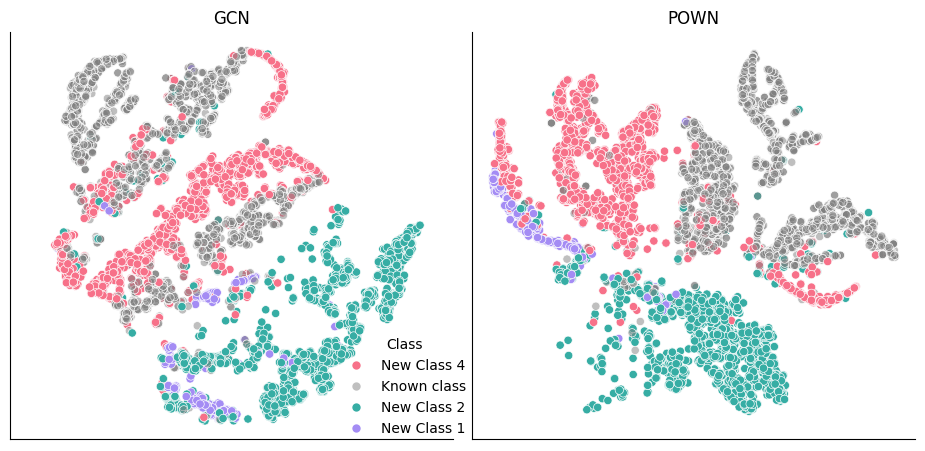

In [62]:

scatter = sns.relplot(data=final_df, x="x", y="y", hue="Class", col="model", palette=custom_palette, legend = "brief")
#scatter.get_legend().remove()
#plt.legend(title='Class', loc='upper right', labels=['New Class 1', 'New Class 2', 'New Class 3', 'Known classes'])
titles = ["GCN", "POWN"]
for i, ax in enumerate(scatter.axes.flat):
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set(xlabel=None)
    ax.set(ylabel=None)
    ax.tick_params(left = False)
    ax.tick_params(bottom = False)
    ax.set_title(titles[i])
sns.move_legend(scatter, "upper left", bbox_to_anchor=(.355, .345))
#plt.legend(title='Class', loc='upper right', labels=['New Class 1', 'New Class 2', 'New Class 3', 'Known classes'])
plt_path = Path("figures/t-SNE_"+"joint_hor"+"_"+"photo"+".pdf")
plt.savefig(plt_path, bbox_inches="tight")

In [ ]:
dataset_name = "photo"#"ogb-arxiv"
model = "pown"

In [ ]:
path = Path("embeddings/embeddings_"+model+"_"+dataset_name+".pth")
embeddings = torch.load(path)
embeddings = embeddings.detach().numpy()
embeddings.shape

In [ ]:
tsne = TSNE(n_components=2, n_jobs=-1)

In [ ]:
path = Path("embeddings/tsne_repr_"+model+"_"+dataset_name+".pth")
if path.is_file():
    recuded_repr = torch.load(path)
else:
    recuded_repr= tsne.fit_transform(embeddings)
    recuded_repr = torch.Tensor(recuded_repr)
    torch.save(recuded_repr, path)
recuded_repr.shape

In [ ]:
datasets = load_folds(dataset_name, unknown_class_ratio=0.4)
data = datasets[0]
data

In [ ]:
labels = data.y
known_class_label =  data.known_classes[0]
print(data.known_classes[0])
labels[data.known_class_mask] = known_class_label
length = data.y.max()+1
print(data.known_classes)
print(data.test_classes)
print(length)
labels.unique()

In [ ]:
mask = data.all_class_test_mask
data_np = recuded_repr[mask,:].numpy()
class_labels_np = labels[mask].numpy()

df = pd.DataFrame({'x': data_np[:, 0], 'y': data_np[:, 1], 'class': class_labels_np})

# Define a default Seaborn color palette
default_palette =  sns.color_palette("husl", length)

# Define the number of classes and scale factor
num_classes = length
scale_factor = 1.5  # You can adjust this scale factor as needed

# Create a custom color palette with larger scale
custom_palette = {}
for i in range(num_classes):
    rgba_color = list(default_palette[i])
    if i == known_class_label:
        custom_palette[i] = (0.502, 0.502, 0.502, 0.5)
    else:
        custom_palette[i] = (*rgba_color, 1.0)  # Set alpha to 1.0 for all classes
	

#custom_palette[known_class_label]  = (0.502, 0.502, 0.502, 1.0)
#no title
#remove tick labels
# may smalelr dots

scatter= sns.scatterplot(data=df, x='x', y='y', hue='class', palette=custom_palette)
scatter.get_legend().remove()
plt.legend(title='Class', loc='lower right', labels=['New Class 1', 'New Class 2', 'New Class 3', 'Known classes'])
scatter.set(xlabel=None)
scatter.set(ylabel=None)
plt.xticks(visible=False)
plt.yticks(visible=False)
plt.tick_params(left = False)
plt.tick_params(bottom = False)



plt_path = Path("figures/t-SNE_"+model+"_"+dataset_name+".pdf")
plt.savefig(plt_path)

#plt.title('T-SNE Embeddings with GCN on '+ "Photo")
plt.show()